In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from ultralytics.yolo.utils.plotting import Annotator

In [13]:
# Load a pretrained YOLOv8n model
model = YOLO('best.pt')

# Open an image using PIL
# source = Image.open('diastema-teeth_140_jpeg_jpg.rf.f0c2dea90444ee2297154947febdc0e7.jpg')

image = cv2.imread('/home/fadhel/Workspaces/intern/dental-disease-detection/tests/cavity.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
image = cv2.resize(image, (640,640))
 

# Run inference on the source
results = model.predict(image, save=False, imgsz=640, conf=0.5, show=False)


0: 640x640 4 Tooth Decay - Crowns, 31.5ms
Speed: 1.1ms preprocess, 31.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


In [14]:
label = model.names
label

{0: 'Fractured Teeth - Crown',
 1: 'Tooth Decay - Crown',
 2: 'misaligned - aligner',
 3: 'multiple tooth loss - implant',
 4: 'single tooth - bridge',
 5: 'spaced - aligner'}

In [15]:
colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255)]
colors = {name: color for name, color in zip(model.names.values(), colors)}
colors

{'Fractured Teeth - Crown': (0, 255, 0),
 'Tooth Decay - Crown': (255, 0, 0),
 'misaligned - aligner': (0, 0, 255),
 'multiple tooth loss - implant': (255, 255, 0),
 'single tooth - bridge': (255, 0, 255),
 'spaced - aligner': (0, 255, 255)}

In [16]:
frame = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
annotator = Annotator(frame, font_size=0.5)
boxes = results[0].boxes

results_data = []

for box in boxes:
    bbox = box.xyxy[0]
    c = box.cls
    class_name = model.names[int(c)]
    color = colors[class_name] 
    confidence = box.conf[0].item()
    confidence = "{:.2f}".format(confidence)

    box_data = {
        'class': class_name,
        'confidence': confidence
    }

    # Append the dictionary to the results_data list
    results_data.append(box_data)
    
    annotator.box_label(bbox, class_name, color=color) 

frame = annotator.result()

In [17]:
results_data

[{'class': 'Tooth Decay - Crown', 'confidence': '0.83'},
 {'class': 'Tooth Decay - Crown', 'confidence': '0.80'},
 {'class': 'Tooth Decay - Crown', 'confidence': '0.80'},
 {'class': 'Tooth Decay - Crown', 'confidence': '0.75'}]

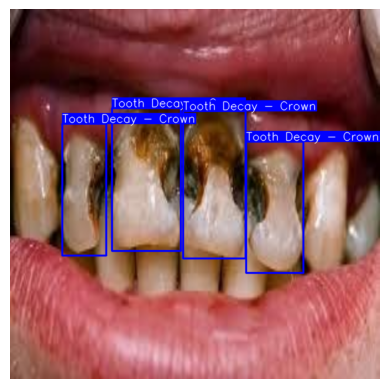

In [18]:
image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()